## Additional Feature -- Under Sampling and Over Sampling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

#supress warning messages
import warnings
warnings.filterwarnings('ignore')

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=69fec2bc00d8a900133593aa2ca5b1e63f0502b2ade307ccb36a63a3ed66a946
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


## Load Data

In [ ]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

path = "/content/drive/My Drive/P1_Final/"
    
train_read = os.path.join(path,"data/P1_MultiClass_preprocess_TRAINSET.csv")
test_read = os.path.join(path,"data/P1_MultiClass_preprocess_TESTSET.csv")

df_train = pd.read_csv(train_read)
df_test= pd.read_csv(test_read)

# label encoding of column: attack category 
attack_cat_labels = dataprep.encode_text_index(df_train, 'attack_cat')
dataprep.encode_text_index(df_test, 'attack_cat')

print("Successfully loaded preprocessed data sets")

print(df_train.shape)
print(df_test.shape)

Successfully loaded preprocessed data sets
(80609, 60)
(35179, 60)


### Converting into Numpy arrays

In [ ]:
# converting x, y numpy arrays for TensorFlow 
x_train, y_train = dataprep.to_xy(df_train, 'attack_cat')
x_test, y_test = dataprep.to_xy(df_test, 'attack_cat')

print(f"Training set shape x:{x_train.shape} y:{y_train.shape}")
print(f"Testing set shape x:{x_test.shape} y:{y_test.shape}")


Training set shape x:(80609, 59) y:(80609, 8)
Testing set shape x:(35179, 59) y:(35179, 8)


## UnderSampling using Imblearn

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss

#checking the count in each class before Undersampling
#print("Before UnderSampling:", Counter(y_train))

# using Imblearn's NearMiss class to undersample dataset
nm = NearMiss(random_state=42)
x_train_undersample, y_train_undersample = nm.fit_sample(x_train,y_train)
print(x_train_undersample.shape, y_train_undersample.shape)

#checking the count in each class after Undersampling
#print("After UnderSampling:", Counter(y_train_undersample))


print(f"Training dataset shape x:{x_train.shape} y:{y_train.shape}")
print(f"UnderSample dataset shape x:{x_train_undersample.shape} y:{y_train_undersample.shape}")



(792, 59) (792, 8)
Training dataset shape x:(80609, 59) y:(80609, 8)
UnderSample dataset shape x:(792, 59) y:(792, 8)


In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_tf_undersample.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(20, input_dim=x_train_undersample.shape[1], activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train_undersample.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    neuralnets_model.fit(x_train_undersample, y_train_undersample, validation_data=(x_test,y_test), callbacks=[monitor,checkpoint],verbose=2,epochs=100)


neuralnets_model.load_weights(filepath_savemodel) # load weights from best model


Epoch 1/100
25/25 - 1s - loss: 2.0972 - val_loss: 2.3276
Epoch 2/100
25/25 - 1s - loss: 2.0416 - val_loss: 2.3181
Epoch 3/100
25/25 - 1s - loss: 1.9819 - val_loss: 2.3011
Epoch 4/100
25/25 - 1s - loss: 1.9031 - val_loss: 2.3324
Epoch 5/100
25/25 - 1s - loss: 1.8381 - val_loss: 2.3528
Epoch 6/100
25/25 - 1s - loss: 1.7719 - val_loss: 2.3616
Epoch 00006: early stopping
Epoch 1/100
25/25 - 1s - loss: 2.0136 - val_loss: 2.7097
Epoch 2/100
25/25 - 1s - loss: 1.9181 - val_loss: 2.6230
Epoch 3/100
25/25 - 1s - loss: 1.8485 - val_loss: 2.5647
Epoch 4/100
25/25 - 1s - loss: 1.7763 - val_loss: 2.5078
Epoch 5/100
25/25 - 1s - loss: 1.7031 - val_loss: 2.4583
Epoch 6/100
25/25 - 1s - loss: 1.6291 - val_loss: 2.4023
Epoch 7/100
25/25 - 1s - loss: 1.5534 - val_loss: 2.3662
Epoch 8/100
25/25 - 1s - loss: 1.4837 - val_loss: 2.3289
Epoch 9/100
25/25 - 1s - loss: 1.4310 - val_loss: 2.3140
Epoch 10/100
25/25 - 1s - loss: 1.3828 - val_loss: 2.2963
Epoch 11/100
25/25 - 1s - loss: 1.3409 - val_loss: 2.2966
E

Performance Evaluation for UnderSampled Dataset
---------------------------------------
Accuracy score: 0.2935558145484522
Precision score: 0.5345315790766723
Recall score: 0.2935558145484522
F1 score: 0.28337418300307227


[[   0    0    1    1    7    0    1    1]
 [   6   24   82   86  490    0    3   26]
 [  89  178  525  570 3771    0   29  131]
 [   0    8   37  271  194    0    0   25]
 [   4    5 9146   37 9254    1    3   10]
 [  18 2545  199 1108 5488  237   19   11]
 [   4   17    7  182  265    0   15   14]
 [   0    0    0   11   21    0    1    1]]


Plotting confusion matrix


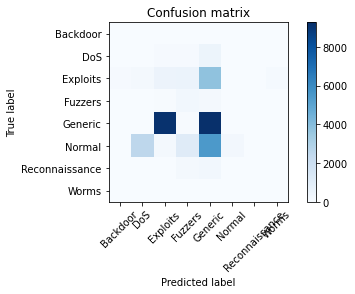



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.01      0.03      0.01       717
           2       0.05      0.10      0.07      5293
           3       0.12      0.51      0.19       535
           4       0.47      0.50      0.49     18460
           5       1.00      0.02      0.05      9625
           6       0.21      0.03      0.05       504
           7       0.00      0.03      0.01        34

    accuracy                           0.29     35179
   macro avg       0.23      0.15      0.11     35179
weighted avg       0.53      0.29      0.28     35179




In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
plotROC = False
graphplot.performance_metrics(pred, y_test, attack_cat_labels, "Performance Evaluation for UnderSampled Dataset", plotROC)

## OverSampling using Imblearn SMOTE

In [ ]:
from imblearn.combine import SMOTETomek

#print("Before OverSampling",Counter(y_train))

smk = SMOTETomek(random_state=24)
x_train_oversample, y_train_oversample = smk.fit_sample(x_train, y_train)
print(x_train_oversample.shape, y_train_oversample.shape)

#print("After OverSampling",Counter(y_train_oversample))

(315788, 59) (315788, 8)


In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_tf_oversample.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(20, input_dim=x_train_oversample.shape[1], activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train_oversample.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    neuralnets_model.fit(x_train_oversample, y_train_oversample, validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100)


neuralnets_model.load_weights(filepath_savemodel) # load weights from best model


Epoch 1/100
9869/9869 - 10s - loss: 0.6662 - val_loss: 0.2713
Epoch 2/100
9869/9869 - 9s - loss: 0.4723 - val_loss: 0.2565
Epoch 3/100
9869/9869 - 9s - loss: 0.4258 - val_loss: 0.2414
Epoch 4/100
9869/9869 - 9s - loss: 0.3995 - val_loss: 0.2300
Epoch 5/100
9869/9869 - 9s - loss: 0.3835 - val_loss: 0.2367
Epoch 6/100
9869/9869 - 9s - loss: 0.3719 - val_loss: 0.2714
Epoch 7/100
9869/9869 - 9s - loss: 0.3655 - val_loss: 0.2202
Epoch 8/100
9869/9869 - 9s - loss: 0.3598 - val_loss: 0.2503
Epoch 9/100
9869/9869 - 9s - loss: 0.3542 - val_loss: 0.2307
Epoch 10/100
9869/9869 - 9s - loss: 0.3487 - val_loss: 0.2378
Epoch 00010: early stopping
Epoch 1/100
9869/9869 - 9s - loss: 0.6641 - val_loss: 0.2433
Epoch 2/100
9869/9869 - 9s - loss: 0.4498 - val_loss: 0.2290
Epoch 3/100
9869/9869 - 9s - loss: 0.4069 - val_loss: 0.2103
Epoch 4/100
9869/9869 - 9s - loss: 0.3835 - val_loss: 0.2192
Epoch 5/100
9869/9869 - 9s - loss: 0.3694 - val_loss: 0.2007
Epoch 6/100
9869/9869 - 9s - loss: 0.3597 - val_loss: 0

Performance Evaluation for OverSampled Dataset
---------------------------------------
Accuracy score: 0.9320048892805367
Precision score: 0.9535320442962062
Recall score: 0.9320048892805367
F1 score: 0.9399572240152725


[[    3     4     1     2     0     0     0     1]
 [   11   325   270    48     2     0    43    18]
 [   76   594  3824   245     3     0   281   270]
 [    1     1     3   520     0     0     6     4]
 [   10   101   158    20 18153     0    10     8]
 [    3     1     5     1     0  9615     0     0]
 [   19     0    52    78     3     0   319    33]
 [    1     1     3     1     0     0     0    28]]


Plotting confusion matrix


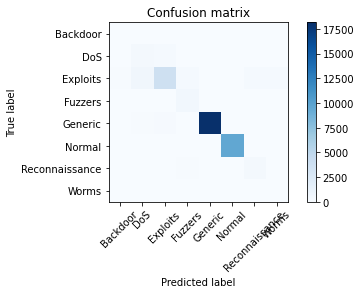



              precision    recall  f1-score   support

           0       0.02      0.27      0.04        11
           1       0.32      0.45      0.37       717
           2       0.89      0.72      0.80      5293
           3       0.57      0.97      0.72       535
           4       1.00      0.98      0.99     18460
           5       1.00      1.00      1.00      9625
           6       0.48      0.63      0.55       504
           7       0.08      0.82      0.14        34

    accuracy                           0.93     35179
   macro avg       0.54      0.73      0.58     35179
weighted avg       0.95      0.93      0.94     35179




In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, attack_cat_labels, "Performance Evaluation for OverSampled Dataset", False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler =  RandomOverSampler(random_state=100)
x_train_os, y_train_os = over_sampler.fit_sample(x_train, y_train)

print(x_train_oversample.shape, y_train_oversample.shape)

(315788, 59) (315788, 8)


In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_tf_randomsampler.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

for i in range(3):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(20, input_dim=x_train_oversample.shape[1], activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train_oversample.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    neuralnets_model.fit(x_train_oversample, y_train_oversample, validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100)


neuralnets_model.load_weights(filepath_savemodel) # load weights from best model


Epoch 1/100
9869/9869 - 10s - loss: 0.6793 - val_loss: 0.2778
Epoch 2/100
9869/9869 - 14s - loss: 0.4748 - val_loss: 0.2559
Epoch 3/100
9869/9869 - 10s - loss: 0.4274 - val_loss: 0.2510
Epoch 4/100
9869/9869 - 9s - loss: 0.4065 - val_loss: 0.2623
Epoch 5/100
9869/9869 - 9s - loss: 0.3925 - val_loss: 0.2409
Epoch 6/100
9869/9869 - 9s - loss: 0.3830 - val_loss: 0.2553
Epoch 7/100
9869/9869 - 9s - loss: 0.3761 - val_loss: 0.2511
Epoch 8/100
9869/9869 - 9s - loss: 0.3719 - val_loss: 0.2588
Epoch 00008: early stopping
Epoch 1/100
9869/9869 - 10s - loss: 0.6504 - val_loss: 0.2556
Epoch 2/100
9869/9869 - 9s - loss: 0.4761 - val_loss: 0.2714
Epoch 3/100
9869/9869 - 10s - loss: 0.4286 - val_loss: 0.2339
Epoch 4/100
9869/9869 - 10s - loss: 0.3971 - val_loss: 0.2400
Epoch 5/100
9869/9869 - 9s - loss: 0.3781 - val_loss: 0.2786
Epoch 6/100
9869/9869 - 9s - loss: 0.3664 - val_loss: 0.2422
Epoch 00006: early stopping
Epoch 1/100
9869/9869 - 9s - loss: 0.6482 - val_loss: 0.2684
Epoch 2/100
9869/9869 -

Performance Evaluation for Random Over-Sampler
---------------------------------------
Accuracy score: 0.9248415247733023
Precision score: 0.9519452824201211
Recall score: 0.9248415247733023
F1 score: 0.9338291342546929


[[    2     5     1     2     0     0     1     0]
 [    5   378   221    61    20     2    23     7]
 [  126   899  3529   317     6     4   309   103]
 [    5     4    18   500     0     0     7     1]
 [    8   138   124    23 18160     2     3     2]
 [    0     0     3     0     0  9618     4     0]
 [   56     7    44    50     6     0   333     8]
 [    2     0    14     3     0     0     0    15]]


Plotting confusion matrix


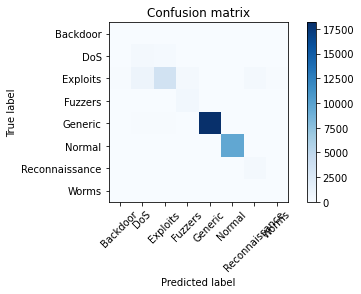



              precision    recall  f1-score   support

           0       0.01      0.18      0.02        11
           1       0.26      0.53      0.35       717
           2       0.89      0.67      0.76      5293
           3       0.52      0.93      0.67       535
           4       1.00      0.98      0.99     18460
           5       1.00      1.00      1.00      9625
           6       0.49      0.66      0.56       504
           7       0.11      0.44      0.18        34

    accuracy                           0.92     35179
   macro avg       0.54      0.67      0.57     35179
weighted avg       0.95      0.92      0.93     35179




In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, attack_cat_labels, "Performance Evaluation for Random Over-Sampler", False)